In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-data/spotify_history.csv


## EDA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df= pd.read_csv("/kaggle/input/spotify-data/spotify_history.csv")

In [4]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [6]:
df.describe()

,ms_played
count,1.498600e+05
mean,1.283166e+05
std,1.178401e+05
min,0.000000e+00
25%,2.795000e+03
50%,1.388400e+05
75%,2.185070e+05
max,1.561125e+06


In [7]:
df.shape

(149860, 11)

In [8]:
df.drop_duplicates().shape

(148675, 11)

In [9]:
missing_values=df.isnull().sum()
print(missing_values)

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64


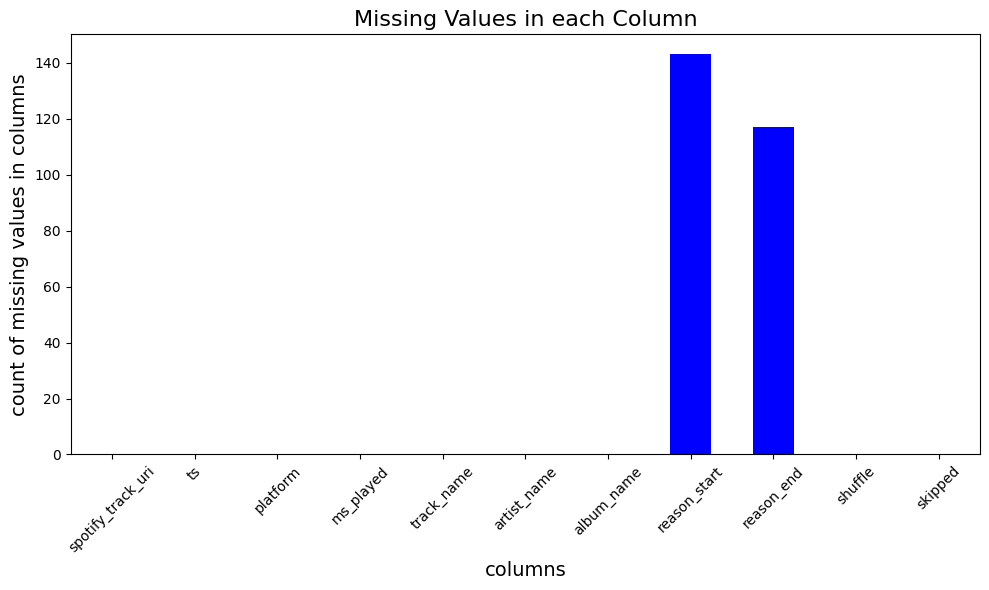

In [10]:
plt.figure(figsize=(10,6))
missing_values.plot(kind="bar", color="blue")
plt.title("Missing Values in each Column",fontsize=16)
plt.xlabel("columns",fontsize=14)
plt.ylabel("count of missing values in columns", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
# most played artist
df_grouped=df.groupby(['artist_name','album_name'])['ms_played'].sum().reset_index()
df_grouped=df_grouped.sort_values(by='ms_played',ascending=False)
print(df_grouped.head(10))

      artist_name                                         album_name  \
7618  The Strokes                                   The New Abnormal   
7124  The Beatles                                        The Beatles   
7331  The Killers                               Imploding The Mirage   
7106  The Beatles                                         Abbey Road   
905     Bob Dylan                                Blood On The Tracks   
7119  The Beatles                                       Past Masters   
7329  The Killers                                           Hot Fuss   
6017   Pink Floyd                                           The Wall   
3625   John Mayer  Where the Light Is: John Mayer Live In Los Ang...   
7337  The Killers                                   Pressure Machine   

      ms_played  
7618  186757895  
7124  186649296  
7331  159923361  
7106  148620310  
905   147889025  
7119  145024076  
7329  144447524  
6017  141105414  
3625  113814001  
7337  113324404  


In [12]:
df["ts"]=pd.to_datetime(df["ts"])

In [13]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [14]:
df["year"]=df["ts"].dt.year

In [15]:
df_2024= df[df["year"]==2024]
df_2023=df[df["year"]==2023]

In [16]:

# Find the most played artist in 2024
most_played_artist_2024 = df_2024.groupby("artist_name")["ms_played"].sum().idxmax() if not df_2024.empty else None

# Find the most played artist in 2023
most_played_artist_2023 = df_2023.groupby("artist_name")["ms_played"].sum().idxmax() if not df_2023.empty else None

# Print results
print(f"Most listened artist in 2024: {most_played_artist_2024}")
print(f"Most listened artist in 2023: {most_played_artist_2023}")
print(f"Same artist as last year? {'Yes' if most_played_artist_2024 == most_played_artist_2023 else 'No'}")


Most listened artist in 2024: John Mayer
Most listened artist in 2023: The Killers
Same artist as last year? No


In [17]:
df_filtered=df[df["skipped"]=="FALSE"]
print(df_filtered.head(10))

Empty DataFrame
Columns: [spotify_track_uri, ts, platform, ms_played, track_name, artist_name, album_name, reason_start, reason_end, shuffle, skipped, year]
Index: []


In [18]:
df_grp=df_filtered.groupby(["artist_name","album_name"])["ms_played"].sum().reset_index()
df_grp=df_grp.sort_values(by="ms_played",ascending=False)
print(df_grp.head(10))

Empty DataFrame
Columns: [artist_name, album_name, ms_played]
Index: []


Recommended Analysis
Which artist did they listen to the most this year? Is it the same as last year?

Which songs have they played the most? How often do they skip them?

What time of day do they typically listen to music?

How often do they explore new artists versus replaying favorites?

Which songs have they played the most? How often do they skip them?

In [19]:
# Step 1: Songs ko group karo aur total play time aur skip count nikalo
df_grouped = df.groupby(['track_name']) \
    .agg(total_played=('ms_played', 'sum'),
         skip_count=('skipped', lambda x: (x == "TRUE").sum())) \
    .reset_index()

# Step 2: Sorting based on total play time
df_grouped = df_grouped.sort_values(by='total_played', ascending=False)

# Step 3: Print top 10 most played songs with skip count
print(df_grouped.head(10))


                                              track_name  total_played  \
8406                                     Ode To The Mets      67431580   
11797  The Return of the King (feat. Sir James Galway...      64401661   
11538  The Fellowship Reunited (feat. Sir James Galwa...      44756730   
82                     19 Dias y 500 Noches - En Directo      42914042   
5767                                        In the Blood      38427087   
2137                     Claudia's Theme - Version Eight      37120900   
3136                                         Dying Breed      36182653   
11451  The Breaking of the Fellowship (feat. "In Drea...      35990898   
550                      All These Things That I've Done      35754915   
1937                                             Caution      35619945   

       skip_count  
8406            0  
11797           0  
11538           0  
82              0  
5767            0  
2137            0  
3136            0  
11451           0  
550  

What time of day do they typically listen to music?

In [20]:
# fuction to categorise time of day
def get_time_of_day(hour):
    if 5<= hour<12 :
        return "morning"
    elif 12<= hour< 17:
        return "afternoon"
    elif 17<= hour<21:
        return "evening"
    else:
        return "night"
    

In [21]:
# extraction of time of day
df["time_of_day"]=df["ts"].dt.hour.apply(get_time_of_day)
print (df)

             spotify_track_uri                  ts    platform  ms_played  \
0       2J3n32GeLmMjwuAzyhcSNe 2013-07-08 02:44:34  web player       3185   
1       1oHxIPqJyvAYHy0PVrDU98 2013-07-08 02:45:37  web player      61865   
2       487OPlneJNni3NWC8SYqhW 2013-07-08 02:50:24  web player     285386   
3       5IyblF777jLZj1vGHG2UD3 2013-07-08 02:52:40  web player     134022   
4       0GgAAB0ZMllFhbNc3mAodO 2013-07-08 03:17:52  web player          0   
...                        ...                 ...         ...        ...   
149855  4Fz1WWr5o0OrlIcZxcyZtK 2024-12-15 23:06:19     android       1247   
149856  0qHMhBZqYb99yhX9BHcIkV 2024-12-15 23:06:21     android       1515   
149857  0HHdujGjOZChTrl8lJWEIq 2024-12-15 23:06:22     android       1283   
149858  7peh6LUcdNPcMdrSH4JPsM 2024-12-15 23:06:23     android       1306   
149859  6iGU74CwXuT4XVepjc9Emf 2024-12-15 23:06:25     android       1893   

                                               track_name        artist_nam

In [28]:
df.head(4)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,year,time_of_day
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2013,night
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2013,night
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2013,night
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2013,night


In [35]:
df["time_of_day"].value_counts().reset_index(name="times").style.background_gradient()

,time_of_day,times
0,night,72397
1,evening,36798
2,morning,25062
3,afternoon,15603


Platfrom Performence

In [36]:
df["platform"].value_counts().reset_index(name="Number_of_times_played").style.background_gradient()

,platform,Number_of_times_played
0,android,139821
1,cast to device,3898
2,iOS,3049
3,windows,1691
4,mac,1176
5,web player,225


In [46]:
df_play_time=df.groupby("platform")["ms_played"].sum().reset_index()
df_play_time=df_play_time.sort_values(by="ms_played",ascending=False)
df_play_time.style.background_gradient()

,platform,ms_played
0,android,17488795178
1,cast to device,726976200
2,iOS,502951091
3,mac,251908949
5,windows,233763391
4,web player,25136126


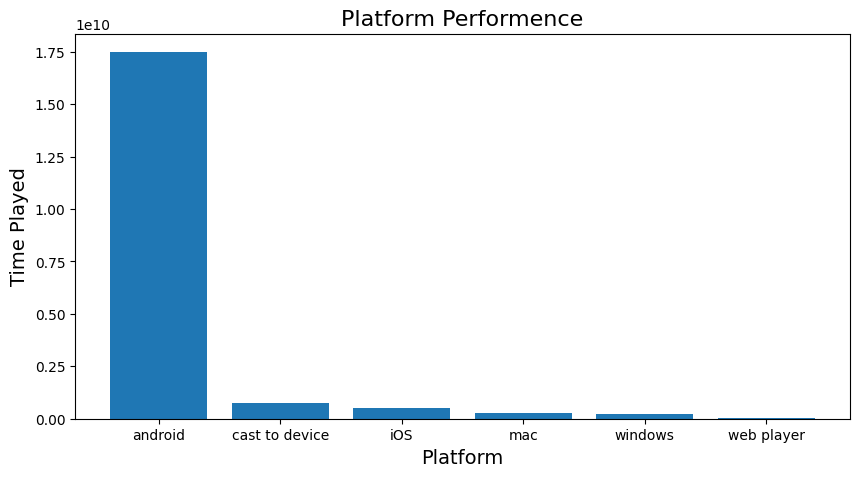

In [48]:
plt.figure(figsize=(10,5))
plt.bar(x=df_play_time["platform"],height=df_play_time["ms_played"]  
)
plt.plot()
plt.xlabel("Platform",fontsize=14)
plt.ylabel("Time Played",fontsize=14)
plt.title("Platform Performence",fontsize=16)
plt.show()

reason to start and reaason to end

In [50]:
df["reason_start"].value_counts().reset_index(name="count").style.background_gradient()

,reason_start,count
0,trackdone,76655
1,fwdbtn,53793
2,clickrow,11228
3,appload,3729
4,backbtn,2205
5,playbtn,1458
6,remote,477
7,trackerror,120
8,unknown,23
9,nextbtn,21


In [51]:
df["reason_end"].value_counts().reset_index(name="count").style.background_gradient()

,reason_end,count
0,trackdone,77194
1,fwdbtn,53470
2,endplay,10119
3,logout,4367
4,backbtn,2182
5,unexpected-exit-while-paused,1725
6,unknown,268
7,remote,224
8,unexpected-exit,118
9,clickrow,34
